# PROYECTO DE PREDICCION DE CHURN TELECOM II

In [4]:
# Importar librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, f1_score, recall_score,
                             classification_report, ConfusionMatrixDisplay, mean_squared_error,
                             mean_absolute_error, r2_score)

from imblearn.over_sampling import SMOTE

import pickle

In [7]:
datos = pd.read_csv('/content/datos_tratados.csv')

In [8]:
datos.head()

,customerid,churn,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,...,paperlessbilling,paymentmethod,charges_monthly,charges_total,gender,seniorcitizen,partner,dependents,tenure,cuentas_diarias
0,0002-ORFBO,0,1,0,DSL,0,1,0,1,1,...,1,Mailed check,65.6,593.30,Female,0,1,1,9,2.19
1,0003-MKNFE,0,1,1,DSL,0,0,0,0,0,...,0,Mailed check,59.9,542.40,Male,0,0,0,9,2.00
2,0004-TLHLJ,1,1,0,Fiber optic,0,0,1,0,0,...,1,Electronic check,73.9,280.85,Male,0,0,0,4,2.46
3,0011-IGKFF,1,1,0,Fiber optic,0,1,1,0,1,...,1,Electronic check,98.0,1237.85,Male,1,1,0,13,3.27
4,0013-EXCHZ,1,1,0,Fiber optic,0,0,0,1,1,...,1,Mailed check,83.9,267.40,Female,1,1,0,3,2.80


In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   int64  
 2   phoneservice      7267 non-null   int64  
 3   multiplelines     7267 non-null   int64  
 4   internetservice   7267 non-null   object 
 5   onlinesecurity    7267 non-null   int64  
 6   onlinebackup      7267 non-null   int64  
 7   deviceprotection  7267 non-null   int64  
 8   techsupport       7267 non-null   int64  
 9   streamingtv       7267 non-null   int64  
 10  streamingmovies   7267 non-null   int64  
 11  contract          7267 non-null   object 
 12  paperlessbilling  7267 non-null   int64  
 13  paymentmethod     7267 non-null   object 
 14  charges_monthly   7267 non-null   float64
 15  charges_total     7267 non-null   float64
 16  gender            7267 non-null   object 


In [10]:
datos.describe()

,churn,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges_monthly,charges_total,seniorcitizen,partner,dependents,tenure,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2279.287581,0.162653,0.484106,0.300124,32.346498,2.157292
std,0.437115,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2267.178963,0.369074,0.499782,0.458343,24.571773,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.610000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,401.400000,0.000000,0.000000,0.000000,9.000000,1.180000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,0.000000,0.000000,0.000000,29.000000,2.340000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,0.000000,1.000000,1.000000,55.000000,2.995000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,72.000000,3.960000


## 2. ANALISIS EXPLORATORIO (EDA)

In [13]:
# Analisis de variables categoricas
print(f"Contrato: {datos.contract.unique()}")
print(f"Servicio de Internet: {datos.internetservice.unique()}")
print(f"Género: {datos['gender'].unique()}")
print(f"Método de Pago: {datos['paymentmethod'].unique()}")

Contrato: ['One year' 'Month-to-month' 'Two year']
Servicio de Internet: ['DSL' 'Fiber optic' 'No']
Género: ['Female' 'Male']
Método de Pago: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [14]:
datos.churn.value_counts(normalize=True).round(3)

,proportion
churn,
0,0.743
1,0.257


In [17]:
# Identificar variables numericas
variables_numericas = datos.select_dtypes(include=['int64','float64']).columns
variables_numericas

Index(['churn', 'phoneservice', 'multiplelines', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'paperlessbilling', 'charges_monthly',
       'charges_total', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'cuentas_diarias'],
      dtype='object')

In [20]:
# Identificar la correlacion de variables
correlacion_numericas = datos[variables_numericas].corr().round(3)
correlacion_numericas

,churn,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges_monthly,charges_total,seniorcitizen,partner,dependents,tenure,cuentas_diarias
churn,1.000,0.013,0.039,-0.167,-0.080,-0.063,-0.160,0.062,0.061,0.187,0.190,-0.194,0.147,-0.149,-0.161,-0.344,0.190
phoneservice,0.013,1.000,0.280,-0.093,-0.052,-0.073,-0.098,-0.025,-0.034,0.014,0.247,0.114,0.010,0.019,-0.004,0.010,0.247
multiplelines,0.039,0.280,1.000,0.098,0.205,0.202,0.098,0.257,0.259,0.163,0.491,0.469,0.145,0.141,-0.028,0.332,0.491
onlinesecurity,-0.167,-0.093,0.098,1.000,0.286,0.276,0.356,0.177,0.190,-0.002,0.298,0.413,-0.038,0.141,0.084,0.327,0.298
onlinebackup,-0.080,-0.052,0.205,0.286,1.000,0.307,0.292,0.283,0.277,0.131,0.443,0.512,0.069,0.140,0.024,0.361,0.443
deviceprotection,-0.063,-0.073,0.202,0.276,0.307,1.000,0.332,0.394,0.403,0.105,0.484,0.524,0.060,0.153,0.015,0.362,0.484
techsupport,-0.160,-0.098,0.098,0.356,0.292,0.332,1.000,0.278,0.280,0.038,0.338,0.431,-0.059,0.116,0.063,0.322,0.338
streamingtv,0.062,-0.025,0.257,0.177,0.283,0.394,0.278,1.000,0.531,0.225,0.629,0.516,0.104,0.125,-0.015,0.281,0.629
streamingmovies,0.061,-0.034,0.259,0.190,0.277,0.403,0.280,0.531,1.000,0.212,0.628,0.521,0.119,0.116,-0.040,0.287,0.628
paperlessbilling,0.187,0.014,0.163,-0.002,0.131,0.105,0.038,0.225,0.212,1.000,0.354,0.160,0.158,-0.011,-0.112,0.008,0.354


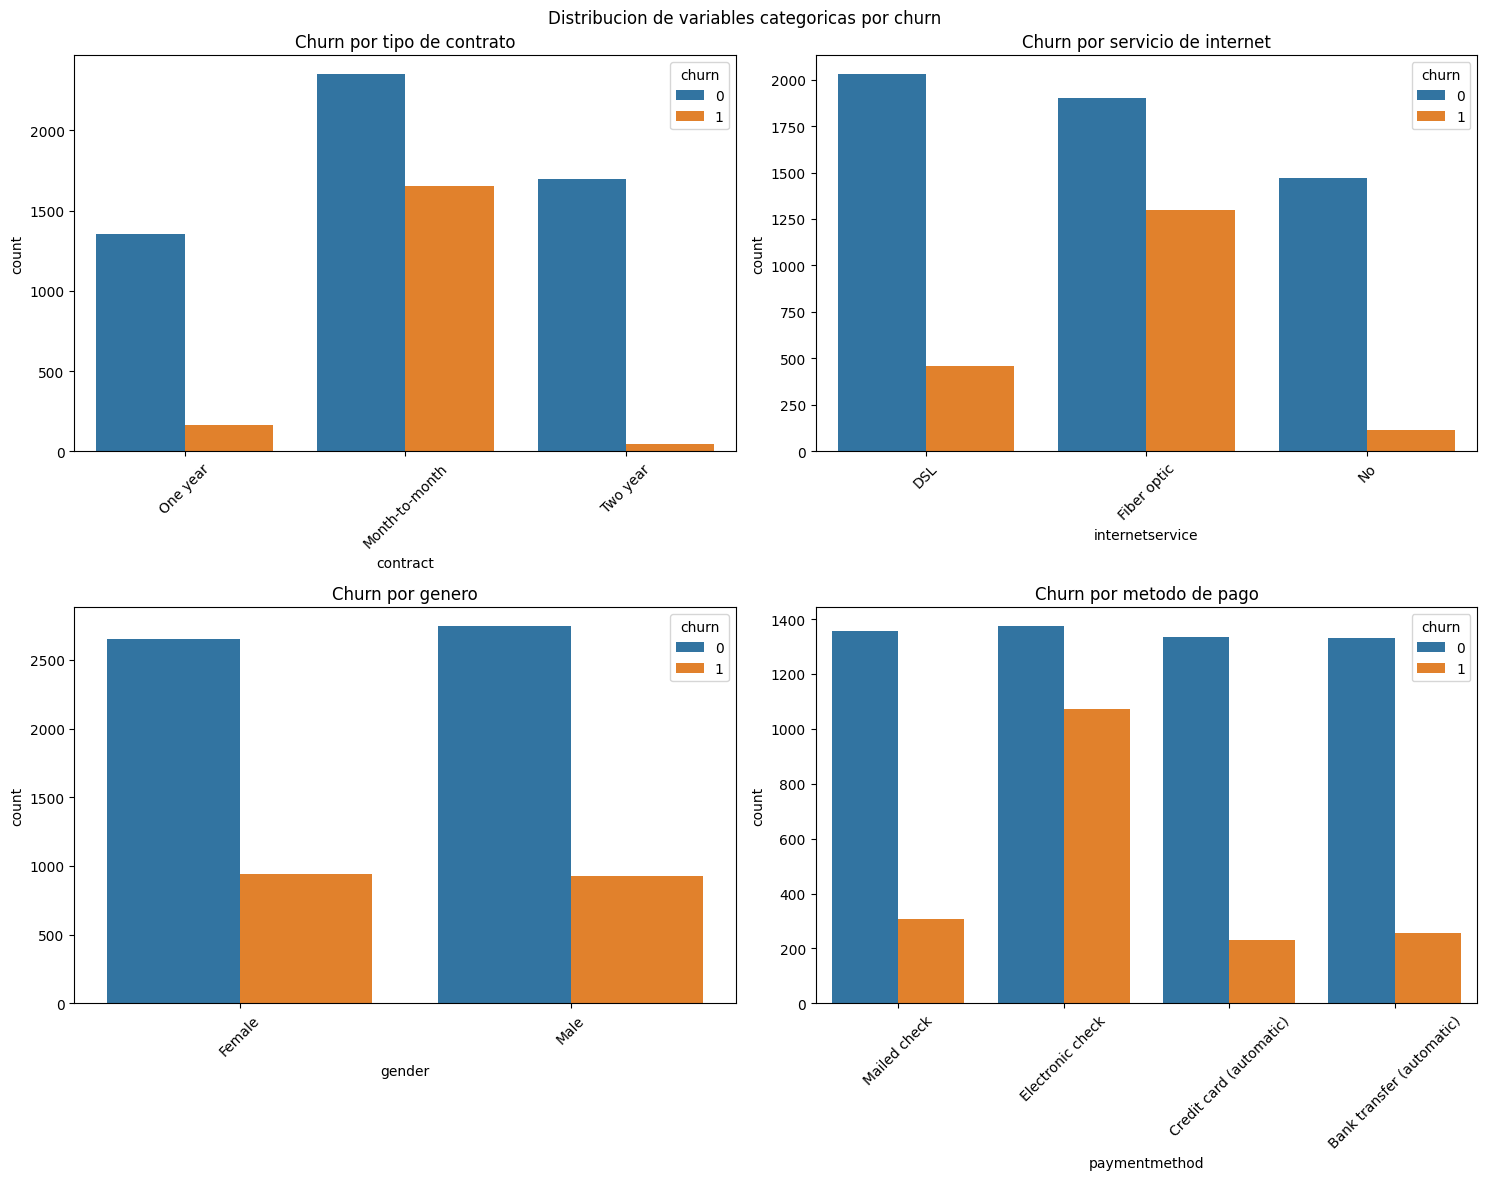

In [22]:
# Variables categoricas vs churn
fig, axes = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle('Distribucion de variables categoricas por churn')

sns.countplot(data=datos, x='contract', hue='churn', ax=axes[0,0])
axes[0,0].set_title('Churn por tipo de contrato')
axes[0,0].tick_params(axis='x', rotation=45)

sns.countplot(data=datos, x='internetservice', hue='churn', ax=axes[0,1])
axes[0,1].set_title('Churn por servicio de internet')
axes[0,1].tick_params(axis='x', rotation=45)

sns.countplot(data=datos, x='gender', hue='churn', ax=axes[1,0])
axes[1,0].set_title('Churn por genero')
axes[1,0].tick_params(axis='x', rotation=45)

sns.countplot(data=datos, x='paymentmethod', hue='churn', ax=axes[1,1])
axes[1,1].set_title('Churn por metodo de pago')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

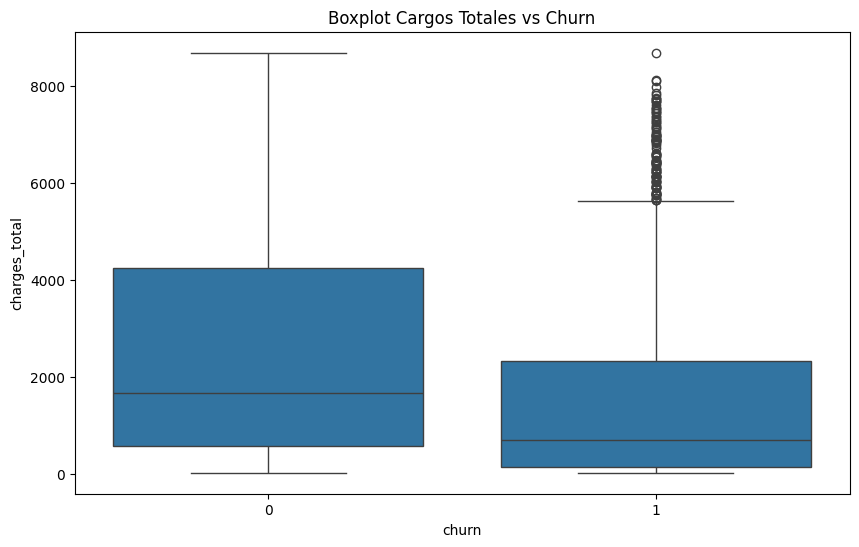

In [23]:
# Boxplot gasto total vs churn
plt.figure(figsize=(10,6))
sns.boxplot(data=datos, x='churn', y='charges_total')
plt.title('Boxplot Cargos Totales vs Churn')
plt.show()

## 3. Preprocesamiento de Datos

In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7267 non-null   int64  
 1   phoneservice      7267 non-null   int64  
 2   multiplelines     7267 non-null   int64  
 3   internetservice   7267 non-null   object 
 4   onlinesecurity    7267 non-null   int64  
 5   onlinebackup      7267 non-null   int64  
 6   deviceprotection  7267 non-null   int64  
 7   techsupport       7267 non-null   int64  
 8   streamingtv       7267 non-null   int64  
 9   streamingmovies   7267 non-null   int64  
 10  contract          7267 non-null   object 
 11  paperlessbilling  7267 non-null   int64  
 12  paymentmethod     7267 non-null   object 
 13  charges_monthly   7267 non-null   float64
 14  charges_total     7267 non-null   float64
 15  gender            7267 non-null   object 
 16  seniorcitizen     7267 non-null   int64  


In [30]:
# Eliminar columnas innecesarias
datos = datos.drop('customerid', axis=1)

KeyError: "['customerid'] not found in axis"

In [31]:
#Definir variables categoricas
categoricas = ['contract', 'paymentmethod', 'gender', 'internetservice']

In [32]:
# Codificacion one-hot para las variables categoricas
datos_codificados = pd.get_dummies(data = datos, columns=categoricas, dtype=int)

In [34]:
# Separacion de caracteristicas y variable objetivo
X = datos_codificados.drop('churn', axis=1)
y = datos_codificados.churn

In [36]:
# un vistazo a los datos
datos.sample(5)

,churn,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,...,paperlessbilling,paymentmethod,charges_monthly,charges_total,gender,seniorcitizen,partner,dependents,tenure,cuentas_diarias
3599,0,1,0,DSL,1,1,1,1,0,0,...,0,Credit card (automatic),65.60,1010.00,Female,0,0,1,15,2.19
6831,0,1,0,No,0,0,0,0,0,0,...,1,Mailed check,19.95,756.40,Female,0,1,1,38,0.66
1805,0,1,0,Fiber optic,0,0,1,1,1,1,...,1,Electronic check,99.25,3532.00,Female,0,0,0,35,3.31
2076,0,1,1,Fiber optic,1,0,0,0,1,1,...,1,Electronic check,100.55,5514.95,Male,0,1,0,56,3.35
1284,0,1,0,DSL,0,1,0,0,0,0,...,1,Mailed check,50.15,50.15,Male,0,0,0,1,1.67


In [37]:
# Normalizacion de variables numericas
scaler = MinMaxScaler()
columnas_numericas = ['charges_total', 'charges_monthly', 'tenure', 'cuentas_diarias']
X[columnas_numericas] = scaler.fit_transform(X[columnas_numericas])

In [38]:
# Dimensiones del dataset modificado
print(f"{X.shape}")
print(f"{y.shape}")

(7267, 28)
(7267,)


In [39]:
X.head()

,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges_monthly,...,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,gender_Female,gender_Male,internetservice_DSL,internetservice_Fiber optic,internetservice_No
0,1,0,0,1,0,1,1,0,1,0.471144,...,0,0,0,0,1,1,0,1,0,0
1,1,1,0,0,0,0,0,1,0,0.414428,...,0,0,0,0,1,0,1,1,0,0
2,1,0,0,0,1,0,0,0,1,0.553731,...,0,0,0,1,0,0,1,0,1,0
3,1,0,0,1,1,0,1,1,1,0.793532,...,0,0,0,1,0,0,1,0,1,0
4,1,0,0,0,0,1,1,0,1,0.653234,...,0,0,0,0,1,1,0,0,1,0


## 4. Division de datos y balanceo de clases

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Distribucion de clases en los datos de entrenamiento")
print(pd.Series(y_train).value_counts(normalize=True))

Distribucion de clases en los datos de entrenamiento
churn
0    0.742818
1    0.257182
Name: proportion, dtype: float64


In [41]:
# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [42]:
pd.Series(y_train_balanced).value_counts(normalize=True)

,proportion
churn,
0,0.5
1,0.5


In [43]:
# las nuevas dimensiones
print(f"{X_train_balanced.shape}")
print(f"{X_test.shape}")
print(f"{y_train_balanced.shape}")
print(f"{y_test.shape}")

(8636, 28)
(1454, 28)
(8636,)
(1454,)


In [44]:
def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"Resultados para {nombre_modelo}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print("\nMatriz de Confusión:")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.show()
    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred))
    print("-"*60)

In [45]:
# Entrenamiento de modelos
modelos = {
    'Arbol de Decision': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=5, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

Entrenando Arbol de Decision ...
Resultados para Arbol de Decision:
Accuracy: 0.7421
Precision: 0.4991
Recall: 0.7460
F1-Score: 0.5981

Matriz de Confusión:


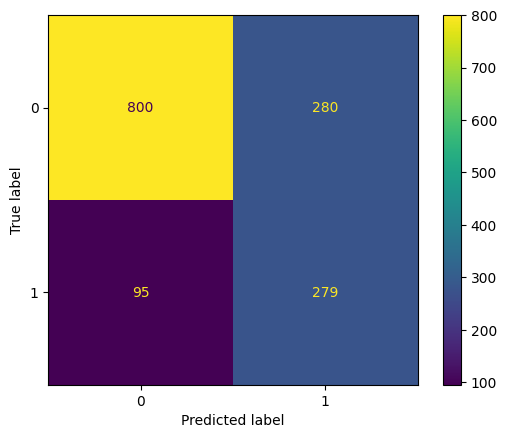


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1080
           1       0.50      0.75      0.60       374

    accuracy                           0.74      1454
   macro avg       0.70      0.74      0.70      1454
weighted avg       0.79      0.74      0.76      1454

------------------------------------------------------------
Entrenando Random Forest ...
Resultados para Random Forest:
Accuracy: 0.7558
Precision: 0.5161
Recall: 0.8155
F1-Score: 0.6321

Matriz de Confusión:


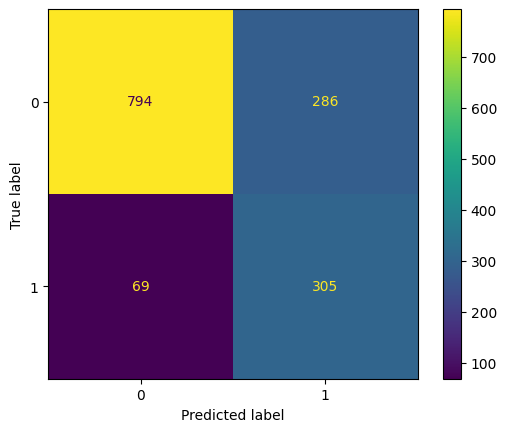


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1080
           1       0.52      0.82      0.63       374

    accuracy                           0.76      1454
   macro avg       0.72      0.78      0.72      1454
weighted avg       0.82      0.76      0.77      1454

------------------------------------------------------------
Entrenando KNN ...
Resultados para KNN:
Accuracy: 0.7077
Precision: 0.4561
Recall: 0.7086
F1-Score: 0.5550

Matriz de Confusión:


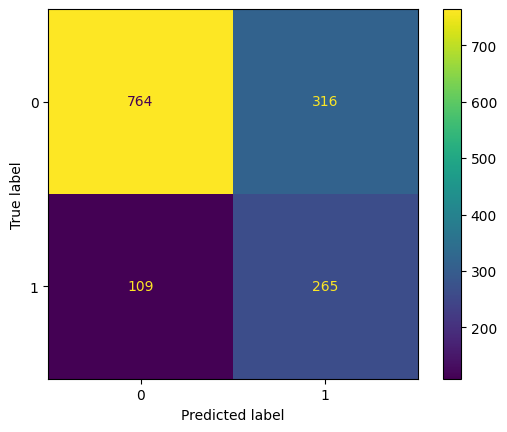


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      1080
           1       0.46      0.71      0.55       374

    accuracy                           0.71      1454
   macro avg       0.67      0.71      0.67      1454
weighted avg       0.77      0.71      0.72      1454

------------------------------------------------------------


In [46]:
# Evaluacion de cada modelo
for nombre, modelo in modelos.items():
  print(f'Entrenando {nombre} ...')
  modelo.fit(X_train_balanced, y_train_balanced)
  y_pred = modelo.predict(X_test)
  evaluar_modelo(y_test, y_pred, nombre)

In [47]:
# Validacion cruzada
print('Realizando validacion cruzada')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
modelo_rf = RandomForestClassifier(max_depth=5, random_state=42)
cv_scores = cross_validate(modelo_rf, X_train_balanced, y_train_balanced, cv=cv, scoring=['accuracy', 'precision',
                                                                                          'recall','f1'])

Realizando validacion cruzada


In [48]:
# Mostrar resultados de validación cruzada
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    scores = cv_scores[f'test_{metric}']
    print(f"\n{metric.capitalize()}:")
    print(f"Media: {scores.mean():.4f}")
    print(f"Desviación estándar: {scores.std():.4f}")
    print(f"Intervalo de confianza: [{scores.mean() - 2*scores.std():.4f}, {scores.mean() + 2*scores.std():.4f}]")


Accuracy:
Media: 0.7832
Desviación estándar: 0.0058
Intervalo de confianza: [0.7717, 0.7948]

Precision:
Media: 0.7570
Desviación estándar: 0.0102
Intervalo de confianza: [0.7365, 0.7774]

Recall:
Media: 0.8349
Desviación estándar: 0.0133
Intervalo de confianza: [0.8082, 0.8615]

F1:
Media: 0.7939
Desviación estándar: 0.0050
Intervalo de confianza: [0.7838, 0.8040]


## 6. Optimizar el modelo

In [49]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [100, 200, 300]
}

In [50]:
# Crear el modelo base
rf_base = RandomForestClassifier(random_state=42)

In [51]:
# Crear el objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1',
    verbose=1
)

In [52]:
# Realizar la búsqueda de hiperparámetros
print("Iniciando búsqueda de hiperparámetros...")
grid_search.fit(X_train_balanced, y_train_balanced)


Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [53]:
# Mostrar los mejores parámetros y puntuación
print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)
print(f"\nMejor puntuación F1: {grid_search.best_score_:.4f}")


Mejores parámetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Mejor puntuación F1: 0.8268



Rendimiento del modelo optimizado en el conjunto de prueba:
Resultados para Random Forest Optimizado:
Accuracy: 0.7682
Precision: 0.5351
Recall: 0.7540
F1-Score: 0.6260

Matriz de Confusión:


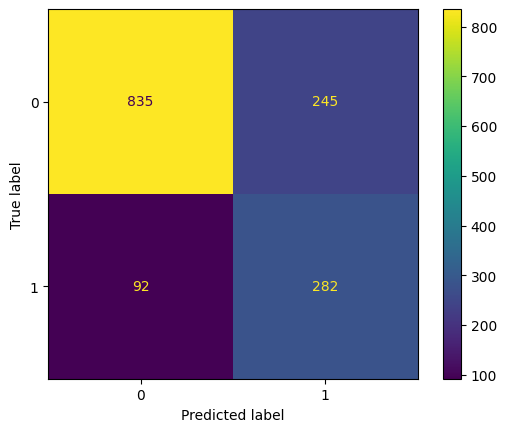


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1080
           1       0.54      0.75      0.63       374

    accuracy                           0.77      1454
   macro avg       0.72      0.76      0.73      1454
weighted avg       0.81      0.77      0.78      1454

------------------------------------------------------------


In [54]:
# Evaluar el modelo optimizado en el conjunto de prueba
mejor_modelo = grid_search.best_estimator_
y_pred_optimizado = mejor_modelo.predict(X_test)
print("\nRendimiento del modelo optimizado en el conjunto de prueba:")
evaluar_modelo(y_test, y_pred_optimizado, "Random Forest Optimizado")

## 7. Guardar y cargar el modelo

In [55]:
# Guardar el modelo optimizado
modelo_nombre = 'modelo_churn_optimizado.pkl'

In [56]:
try:
    with open(modelo_nombre, 'wb') as file:
        pickle.dump(mejor_modelo, file)
    print(f"Modelo guardado exitosamente como '{modelo_nombre}'")
except Exception as e:
    print(f"Error al guardar el modelo: {str(e)}")

Modelo guardado exitosamente como 'modelo_churn_optimizado.pkl'


In [58]:
# Cargar el modelo y hacer una predicción de ejemplo
try:
    with open(modelo_nombre, 'rb') as file:
        modelo_cargado = pickle.load(file)
    print("Modelo cargado exitosamente")

    # Crear un ejemplo para predicción
    ejemplo = X_test.iloc[0].values.reshape(1, -1)
    prediccion = modelo_cargado.predict(ejemplo)
    probabilidades = modelo_cargado.predict_proba(ejemplo)

    print("\nEjemplo de predicción:")
    print(f"Predicción: {'Abandono' if prediccion[0] == 1 else 'No Abandono'}")
    print(f"Probabilidad de abandono: {probabilidades[0][1]:.4f}")

except Exception as e:
    print(f"Error al cargar el modelo: {str(e)}")

Modelo cargado exitosamente

Ejemplo de predicción:
Predicción: No Abandono
Probabilidad de abandono: 0.3095


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
